In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# API URL

In [1]:
api_url = 'https://data.norges-bank.no/api/data/LIQUIDITY_FORECAST/D.STAT_T+STAT_S+FCAST_T+FCAST_S.2022..?format=csv&startPeriod=2022-01-17&endPeriod=2022-12-31&locale=en'

In [2]:
print(sns.__version__)

0.13.0


# Load the Dataset

In [3]:
df = pd.read_csv('Base.csv')

# Calculate Summary Statistics for "Bank Fraud"

In [4]:
BankFraud = df.describe()

# Display The Summary Statistics

In [5]:
print("Summary Statistics for BankFraud")
print(df)

Summary Statistics for BankFraud
        fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                1     0.9               0.166828                         -1   
1                1     0.9               0.296286                         -1   
2                1     0.9               0.044985                         -1   
3                1     0.9               0.159511                         -1   
4                1     0.9               0.596414                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.6               0.192631                         -1   
999996           0     0.8               0.322989                        148   
999997           0     0.8               0.879403                         -1   
999998           0     0.9               0.762112                         -1   
999999           0     0.2               0.697452                         -1   

      

# Display First Five Rows of The Dataset for Overview

In [37]:
print(df.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0               -1.331345           AA           769  ..

# Check the Shape of The Dataset

In [38]:
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1000000
Number of columns: 32


# Check for The Missing Values

In [39]:
print(df.isnull().sum())

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

# Get Data Types of Column

In [40]:
print(df.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

# Summary Statistics

In [41]:
print(df.describe())

           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

# Data Analysis Through Heatmap

#### This heatmap show the relatioship between each other that which factor will have the most risk on bank fraud.

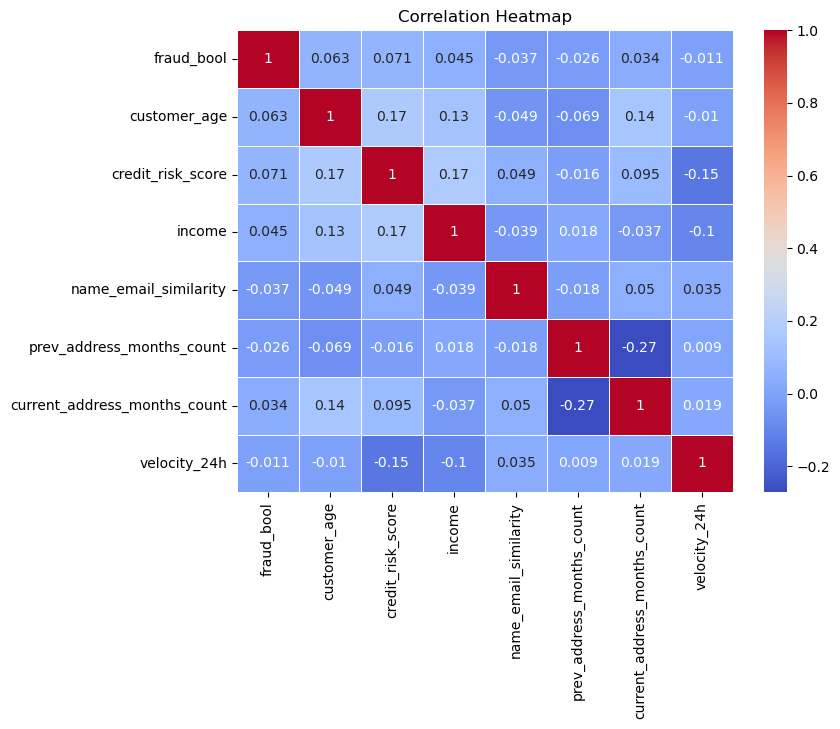

In [42]:
columns_to_analyze = ["fraud_bool","customer_age","credit_risk_score", "income","name_email_similarity","prev_address_months_count","current_address_months_count","velocity_24h"]
# Velocity = Number of Application
correlation_matrix = df[columns_to_analyze].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 1: How Fraud_ bool data related to others feature?

In [43]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

# 0 = False (Not Fraud)
# 1 = True (Fraud)

             count
fraud_bool        
0           988971
1            11029


#### This graph show the number of customer account both fraud and not fraud.

In [44]:
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

C:\Users\81807\AppData\Local\Temp\ipykernel_1900\1280668636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)


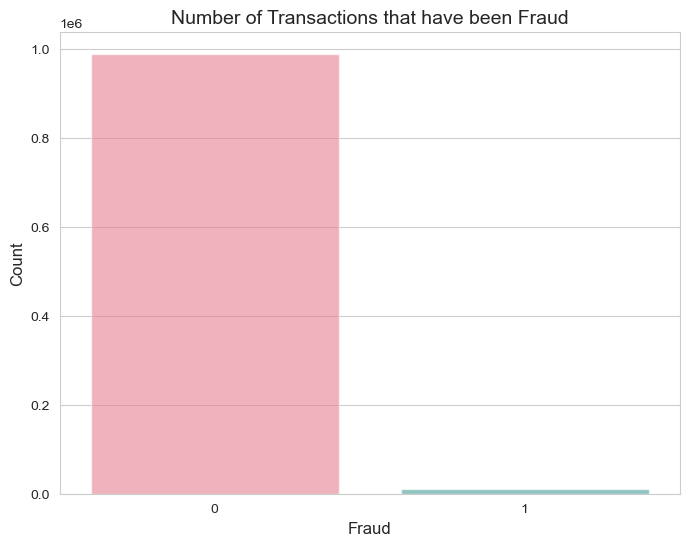

In [45]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions that have been Fraud", fontsize=14)

# Display plot
plt.show()

### Missing Values of Features: To analyse which features have a highest risk to be fraud.

In [46]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN (undefine data), calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


In [47]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


### This graph shows the percentage of each features both fraud and not fraud.

<Figure size 800x600 with 0 Axes>

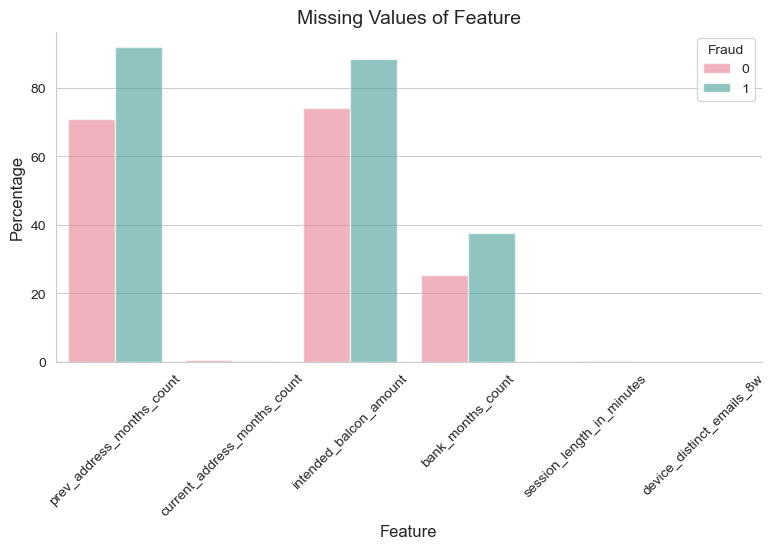

In [62]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Feature", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

### Distribution Graph Shows The Density of Each Features

In [71]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


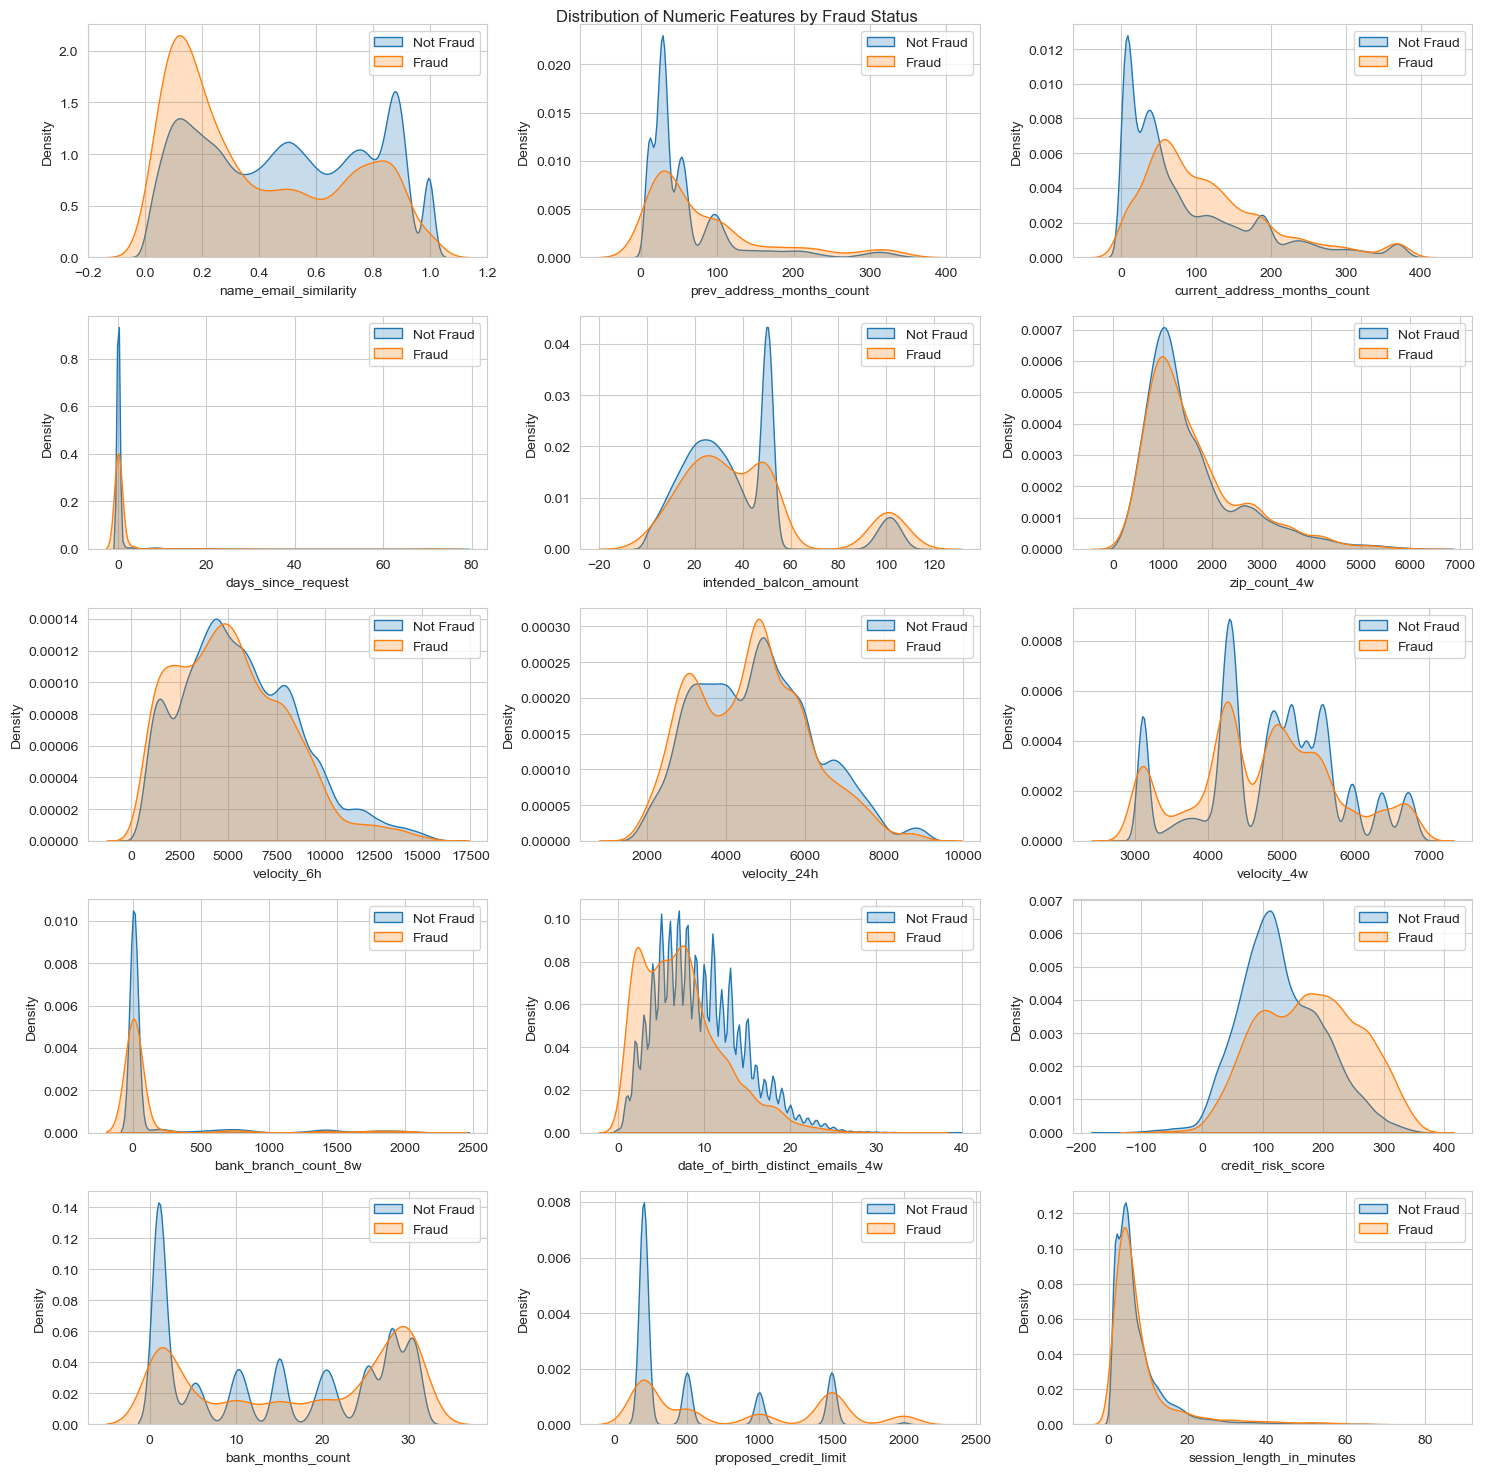

In [72]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# 2: Is there a relationship between customer age and the likelihood of fraud?

#### The charts compare the number of customers and the likelihood of fraud across different age groups. This could suggest an investigation into whether certain age groups are more susceptible to fraud than others.

<Axes: xlabel='customer_age', ylabel='count'>

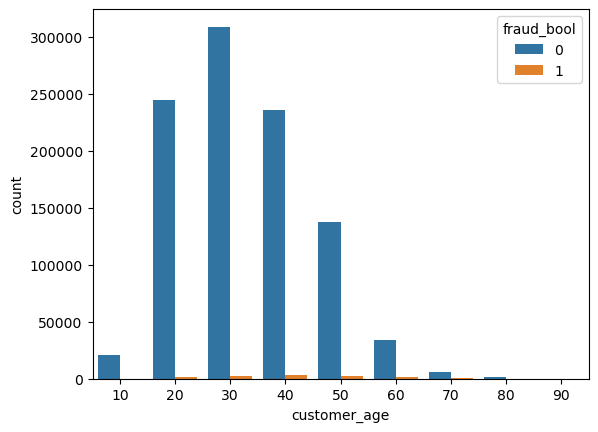

In [26]:
sns.countplot(df, x="customer_age", hue="fraud_bool")

<Axes: xlabel='customer_age', ylabel='percent'>

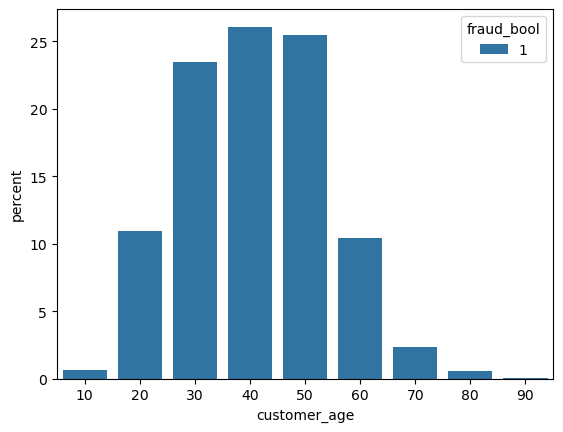

In [27]:
sns.countplot(fraud_data, x="customer_age", hue="fraud_bool",stat="percent")

<Axes: xlabel='customer_age', ylabel='percent'>

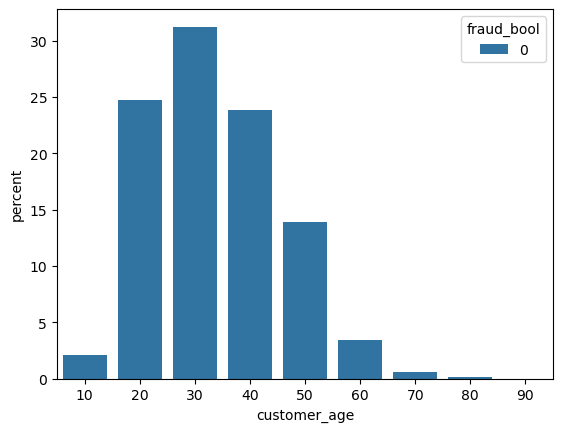

In [28]:
sns.countplot(fraud_data2, x="customer_age", hue="fraud_bool",stat="percent")

# 3: Is there a relationship between the operating system and the likelihood of fraud?

#### These charts compare the number and percentage of fraud cases across different operating systems (Windows, Linux, Macintosh, and Other). This could suggest an investigation into whether certain operating systems are more susceptible to fraud than others.

In [6]:
fraud_data = df[df['fraud_bool'] == 1]
fraud_data2 = df[df['fraud_bool'] == 0]

<Axes: xlabel='device_os', ylabel='count'>

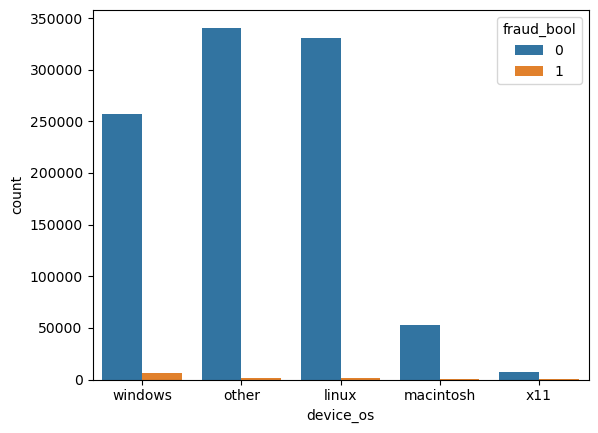

In [7]:
sns.countplot(df, x="device_os", hue="fraud_bool")

<Axes: xlabel='device_os', ylabel='percent'>

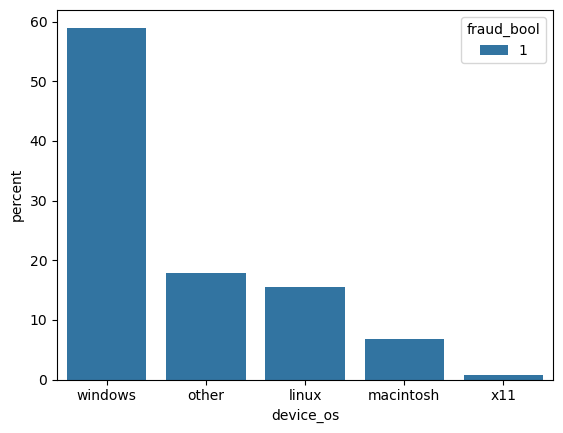

In [24]:
sns.countplot(fraud_data, x="device_os", hue="fraud_bool",stat="percent")

<Axes: xlabel='device_os', ylabel='percent'>

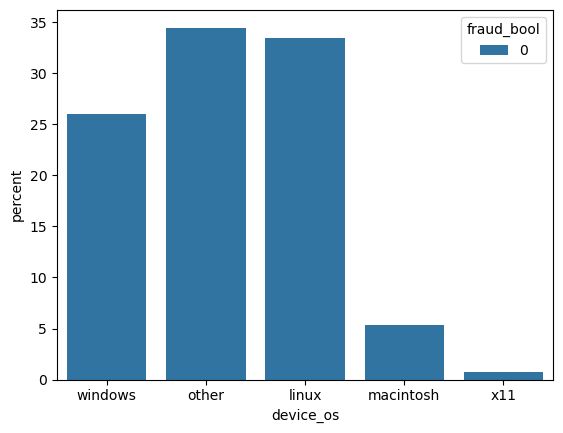

In [25]:
sns.countplot(fraud_data2, x="device_os", hue="fraud_bool",stat="percent")